In [1]:
import os
import warnings
# suppress warning
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
raw_dir = ['../dataset/mp_data/voltage_2020_08_05.csv']
target_dir = ['../regression/result/dnn_2020_09_25/1234']
prefix = 'H_test_dnn_best_'

In [3]:
def show_diff(dir_name):
    raw_data = pd.read_csv(raw_dir[0])
    raw_data['volume_change'] = 100 / (1 + raw_data['max_delta_volume'].values)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_pred_value.csv'), index_col=0)
    pred_data['diff'] = pred_data['test_pred'] - pred_data['test_ground_truth']
    pred_data['diff_abs'] = abs(pred_data['diff'])
    pred_data = pred_data.sort_values(by=['diff_abs'], ascending=False)
    concat_data = pd.merge(pred_data, raw_data, left_on='raw_index', right_on='Unnamed: 0')
    return concat_data
   
show_cols = [
    'test_ground_truth', 'test_pred', 'raw_index', 'diff', 'diff_abs', 'formula_charge', 
    'formula_discharge', 'max_delta_volume', 'volume_change',
]
concat_data = show_diff(target_dir[0])
concat_data[show_cols][0:15]

,test_ground_truth,test_pred,raw_index,diff,diff_abs,formula_charge,formula_discharge,max_delta_volume,volume_change
0,5.772298,3.140481,3479,-2.631816,2.631816,P(W3O10)4,K3P(W3O10)4,0.069532,93.498838
1,0.942894,2.884653,1577,1.941759,1.941759,Li2Ti3NiO8,Li11Ti12(NiO8)4,0.001194,99.880719
2,5.371883,3.460085,400,-1.911798,1.911798,Li2Fe2CoO6,Li3Fe2CoO6,0.014480,98.572706
3,4.712381,2.896276,5067,-1.816105,1.816105,Mg2Fe2(SiO4)3,Mg3Fe2(SiO4)3,0.037551,96.380820
4,2.819894,4.427971,1024,1.608077,1.608077,Cr(PO3)3,LiCr(PO3)3,0.076689,92.877309
5,2.255445,3.850641,3098,1.595196,1.595196,Na3Fe3(PO4)4,Na6Li3Fe6(PO4)8,0.022010,97.846383
6,6.140095,4.545471,1191,-1.594624,1.594624,Li2FeF6,Li3FeF6,0.119220,89.347924
7,4.887962,3.326937,5053,-1.561026,1.561026,NaCa3Fe(SiO3)8,NaCa3Mg3Fe(SiO3)8,0.054274,94.852005
8,1.037447,2.583968,2173,1.546521,1.546521,LiTiCrO4,Li2TiCrO4,0.008960,99.111948
9,4.633228,3.089554,3468,-1.543674,1.543674,CoNCl4O3,Rb3CoNCl4O3,0.287168,77.689912


In [4]:
df_high_vol = concat_data[concat_data['test_ground_truth'] > 4.0] 
print('voltage > 4.0 case MAE')
print(mean_absolute_error(df_high_vol['test_ground_truth'].values, df_high_vol['test_pred'].values)) 
print('original MAE')
print(mean_absolute_error(concat_data['test_ground_truth'].values, concat_data['test_pred'].values))

voltage > 4.0 case MAE
0.45612517528537844
original MAE
0.38755326835131565


In [5]:
concat_data[concat_data['test_ground_truth'] > 4.0][show_cols][0:10]

,test_ground_truth,test_pred,raw_index,diff,diff_abs,formula_charge,formula_discharge,max_delta_volume,volume_change
0,5.772298,3.140481,3479,-2.631816,2.631816,P(W3O10)4,K3P(W3O10)4,0.069532,93.498838
2,5.371883,3.460085,400,-1.911798,1.911798,Li2Fe2CoO6,Li3Fe2CoO6,0.014480,98.572706
3,4.712381,2.896276,5067,-1.816105,1.816105,Mg2Fe2(SiO4)3,Mg3Fe2(SiO4)3,0.037551,96.380820
6,6.140095,4.545471,1191,-1.594624,1.594624,Li2FeF6,Li3FeF6,0.119220,89.347924
7,4.887962,3.326937,5053,-1.561026,1.561026,NaCa3Fe(SiO3)8,NaCa3Mg3Fe(SiO3)8,0.054274,94.852005
9,4.633228,3.089554,3468,-1.543674,1.543674,CoNCl4O3,Rb3CoNCl4O3,0.287168,77.689912
10,5.977202,4.436843,2589,-1.540359,1.540359,NiF3,LiNiF3,0.152662,86.755728
18,6.325246,5.048390,3251,-1.276856,1.276856,NiF4,CaNiF4,0.018822,98.152569
19,4.207026,2.949879,5068,-1.257147,1.257147,MgV6(FeO6)4,Mg3V6(FeO6)4,0.006448,99.359364
20,5.148303,3.894163,5022,-1.254140,1.254140,Cr(SO4)2,MgCr3(SO4)6,0.005362,99.466610


In [6]:
# see regression result

def yy_plot(dir_name, file_name):
    na_score = pd.read_csv(os.path.join(dir_name, 'test_score.csv'))
    print(na_score)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_pred_value.csv'))
    min_val = min(min(pred_data['test_ground_truth']), min(pred_data['test_pred']))
    max_val = max(max(pred_data['test_ground_truth']), max(pred_data['test_pred']))
    margin = (max_val - min_val) * 0.1
    xy_lim = [0, 7.0]
    fig = plt.figure(figsize=[6, 6])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xy_lim, xy_lim, 'k-')
    ax.plot(pred_data['test_ground_truth'], pred_data['test_pred'], 'o', color='#d4542c', markersize=5)
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
    ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7])
    ax.set_yticklabels([0, 1, 2, 3, 4, 5, 6, 7])
    ax.tick_params(labelsize=20)
    fig.savefig(os.path.join('png', '{}.png'.format(file_name)), format="png", dpi=300)

  Unnamed: 0   R2_test  MAE_test  RMSE_test
0       test  0.755001  0.387553   0.513656


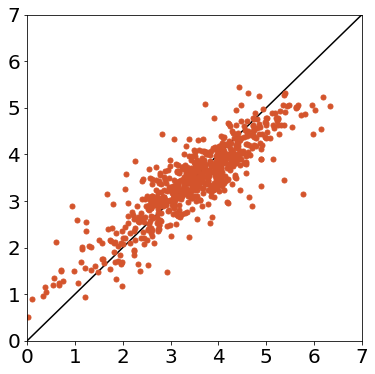

In [7]:
yy_plot(target_dir[0], prefix + 'yyplot')